<a href="https://colab.research.google.com/github/shajeeraza12/shajeeraza12/blob/main/AOATask8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author: Shajee Raza (Сайид мухаммад шаджи раза)
# Title: (Extended). Practical analysis of advanced algorithms

# Goal
The goal of this work is to analyze and implement the Recursion Tree method, Prim's algorithm, and the Floyd-Warshall algorithm, focusing on their time and space complexities. The study also aims to visualize and experiment with these algorithms to gain insights into their performance across various scenarios.

# Brief theoretical part
*     **Recursion Tree Method:** This technique is used to solve recurrences by
visualizing the recursive calls as a tree structure. It helps in deriving the time complexity of recursive algorithms by summing the work done at each level of recursion.

*     **Prim’s Algorithm:** A greedy algorithm used to find the Minimum Spanning Tree (MST) of a weighted, undirected graph. It starts with an arbitrary vertex and progressively adds the smallest edge connecting a vertex inside the MST to one outside, ensuring minimal total edge weight.

*     **Floyd-Warshall Algorithm:** A dynamic programming algorithm used to find the shortest paths between all pairs of vertices in a weighted, directed graph. It iteratively updates a distance matrix to compute the shortest path using each vertex as an intermediate point.




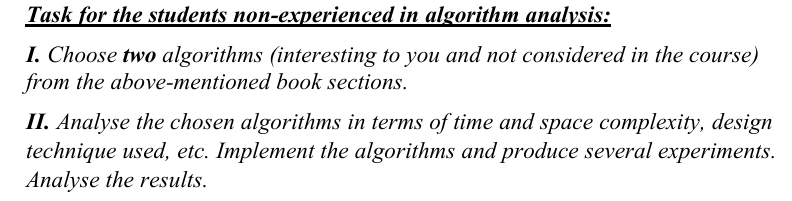

The first algorithm I've first chosen is the "Recursion Tree Method" and to answer the questions I've taken a problem from the exercise given at the end of the chapter. The question is as follows:

Use a recursion tree to give an asymptotically tight solution to the recurrence T(n) = T(ALPHA(n)) + T((1 -ALPHA)n) + cn, where ALPHA is a constant in the range 0 < ALPHA < 1 and c > 0 is also a constant.

In [9]:
# Import required libraries
import matplotlib.pyplot as plt
import math

# Function to Calculate Total Work at Each Level

In [10]:
# Function to calculate work at a given level of the recursion tree
def calculate_level_work(n, alpha, c):
    work_per_level = []
    while n >= 1:
        work_per_level.append(c * n)  # Work at the current level
        n = alpha * n  # Reduce problem size
    return work_per_level

# Function to Simulate the Recursion Tree

In [11]:
# Simulate the recursion tree and plot total work per level
def simulate_recursion_tree(n, alpha, c):
    work_per_level = calculate_level_work(n, alpha, c)
    total_work = sum(work_per_level)

    # Plot the work done at each level
    levels = range(len(work_per_level))
    plt.figure(figsize=(8, 6))
    plt.bar(levels, work_per_level, color='skyblue')
    plt.xlabel("Recursion Tree Level")
    plt.ylabel("Work at Level")
    plt.title("Work Per Level in the Recursion Tree")
    plt.show()

    print(f"Total work done across all levels: {total_work}")
    return

# Executing with Example Parameters

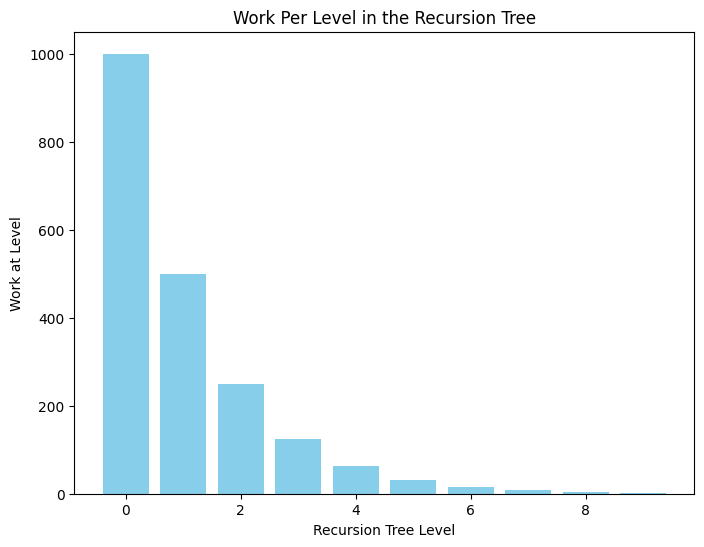

Total work done across all levels: 1998.046875


In [12]:
# Example parameters
n = 1000   # Initial problem size
alpha = 0.5  # Fractional split (e.g., divide into half)
c = 1       # Cost per level

# Simulate the recursion tree and calculate total work
simulate_recursion_tree(n, alpha, c)

The bar heights decrease as the recursion proceeds deeper into the tree. This decrease reflects the shrinking size of subproblems. The initial work cn is the largest, as this is the cost of solving the original problem.

The work at each level decreases exponentially because α and (1−α) shrink the problem size.

**Time Complexity:**

The cost at each level is cn, and there are logn levels (as the input size is halved each time).

*Total complexity:* O(nlogn).

**Space Complexity:**

The recursion depth is logn, so the space complexity is O(logn).



# Second Algorithm
The second algorithm that I've chosen is Prim's Algorithm. And to answer the questions of the task I've similarly taken a question from the exercise. The question is as follows:

"Suppose that we represent the graph G = (V, E) as an adjacency matrix. Give a simple implementation of Prim’s algorithm for this case that runs in O(V^2) time."

# Creating a graph

In [13]:
# Graph representation using an adjacency matrix
# Infinite (float('inf')) represents no edge between vertices
def create_graph():
    """
    Creates a sample graph using an adjacency matrix.
    Vertices are represented as integers starting from 0.

    Returns:
        graph (list of list): Adjacency matrix representation of the graph.
    """
    return [
        [0, 2, float('inf'), 6, float('inf')],
        [2, 0, 3, 8, 5],
        [float('inf'), 3, 0, float('inf'), 7],
        [6, 8, float('inf'), 0, 9],
        [float('inf'), 5, 7, 9, 0]
    ]

# Prim's Algorithm Implementation

In [14]:
def prims_algorithm(graph):
    # Number of vertices in the graph
    V = len(graph)

    # Track vertices included in MST
    in_mst = [False] * V

    # To store the minimum weight edge to a vertex not in MST
    min_edge = [float('inf')] * V
    min_edge[0] = 0  # Start from the first vertex

    # To store the parent of each vertex in the MST
    parent = [-1] * V

    for _ in range(V):
        # Select the vertex with the smallest edge weight
        u = min((v for v in range(V) if not in_mst[v]), key=lambda v: min_edge[v])
        in_mst[u] = True

        # Update adjacent vertices
        for v in range(V):
            if graph[u][v] != float('inf') and not in_mst[v] and graph[u][v] < min_edge[v]:
                min_edge[v] = graph[u][v]
                parent[v] = u

    # Build the MST edges and calculate total weight
    mst_edges = []
    total_weight = 0
    for v in range(1, V):  # Start from 1 since 0 is the root
        mst_edges.append((parent[v], v, graph[parent[v]][v]))
        total_weight += graph[parent[v]][v]

    return mst_edges, total_weight

# Running and Testing the Algorithm

In [15]:
# Create the graph
graph = create_graph()

# Run Prim's algorithm
mst_edges, total_weight = prims_algorithm(graph)

# Output the results
print("Edges in the MST and their weights:")
for u, v, weight in mst_edges:
    print(f"Edge ({u} - {v}): Weight = {weight}")

print(f"Total weight of the MST: {total_weight}")

Edges in the MST and their weights:
Edge (0 - 1): Weight = 2
Edge (1 - 2): Weight = 3
Edge (0 - 3): Weight = 6
Edge (1 - 4): Weight = 5
Total weight of the MST: 16


# Visualizing our findings

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph_and_mst(graph, mst_edges):
    """
    Visualizes the input graph and highlights the MST edges.

    Parameters:
        graph (list of list): Adjacency matrix representation of the graph.
        mst_edges (list of tuple): List of edges in the MST (u, v, weight).
    """
    G = nx.Graph()
    mst_G = nx.Graph()

    # Add edges and weights from the adjacency matrix to the graph
    for i in range(len(graph)):
        for j in range(len(graph)):
            if graph[i][j] != float('inf') and i < j:  # Add each edge once
                G.add_edge(i, j, weight=graph[i][j])

    # Add MST edges to a separate graph
    for u, v, weight in mst_edges:
        mst_G.add_edge(u, v, weight=weight)

    # Create positions for nodes
    pos = nx.spring_layout(G)  # Positions for all nodes

    # Draw the original graph
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Original Graph")
    plt.show()

    # Draw the MST
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
    nx.draw(mst_G, pos, with_labels=True, edge_color='green', width=2.5, node_size=500)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Graph Highlighting MST")
    plt.show()

Edges in the MST and their weights:
Edge (0 - 1): Weight = 2
Edge (1 - 2): Weight = 3
Edge (0 - 3): Weight = 6
Edge (1 - 4): Weight = 5
Total weight of the MST: 16


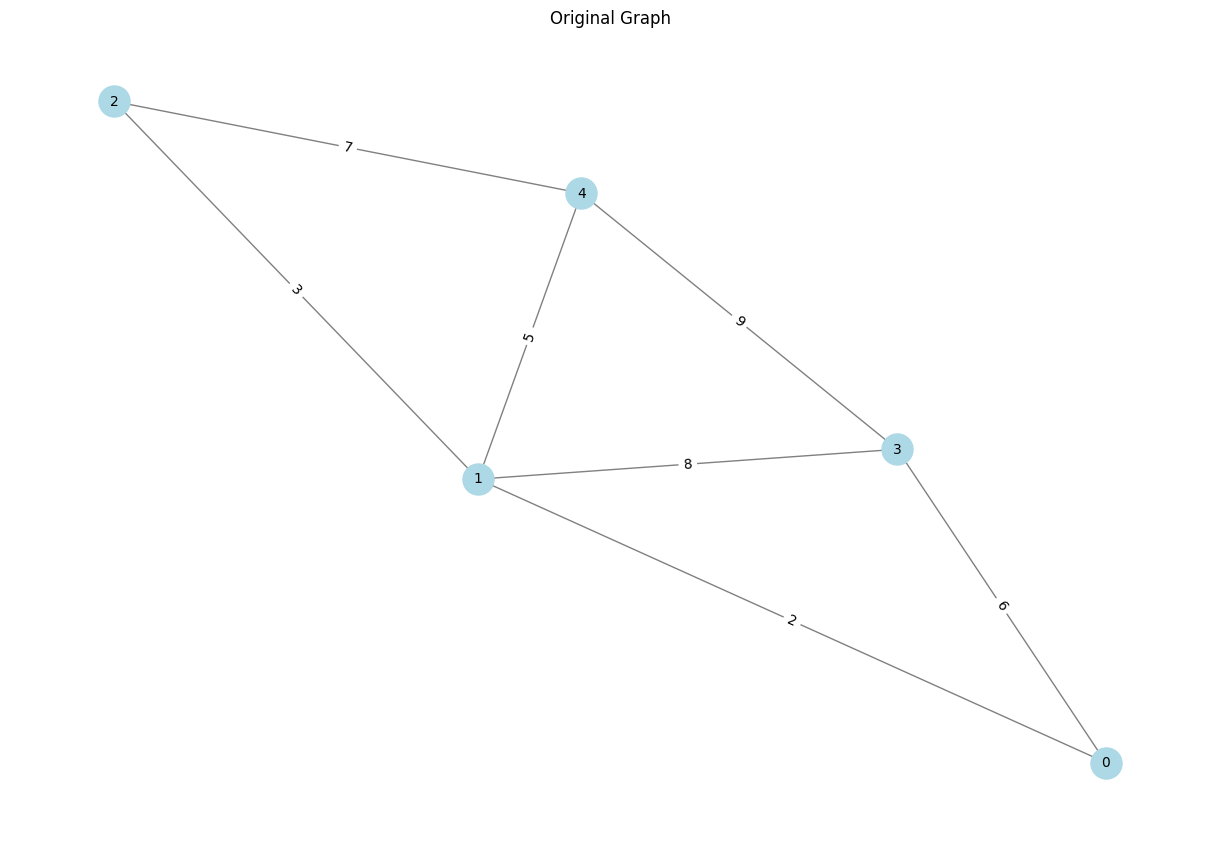

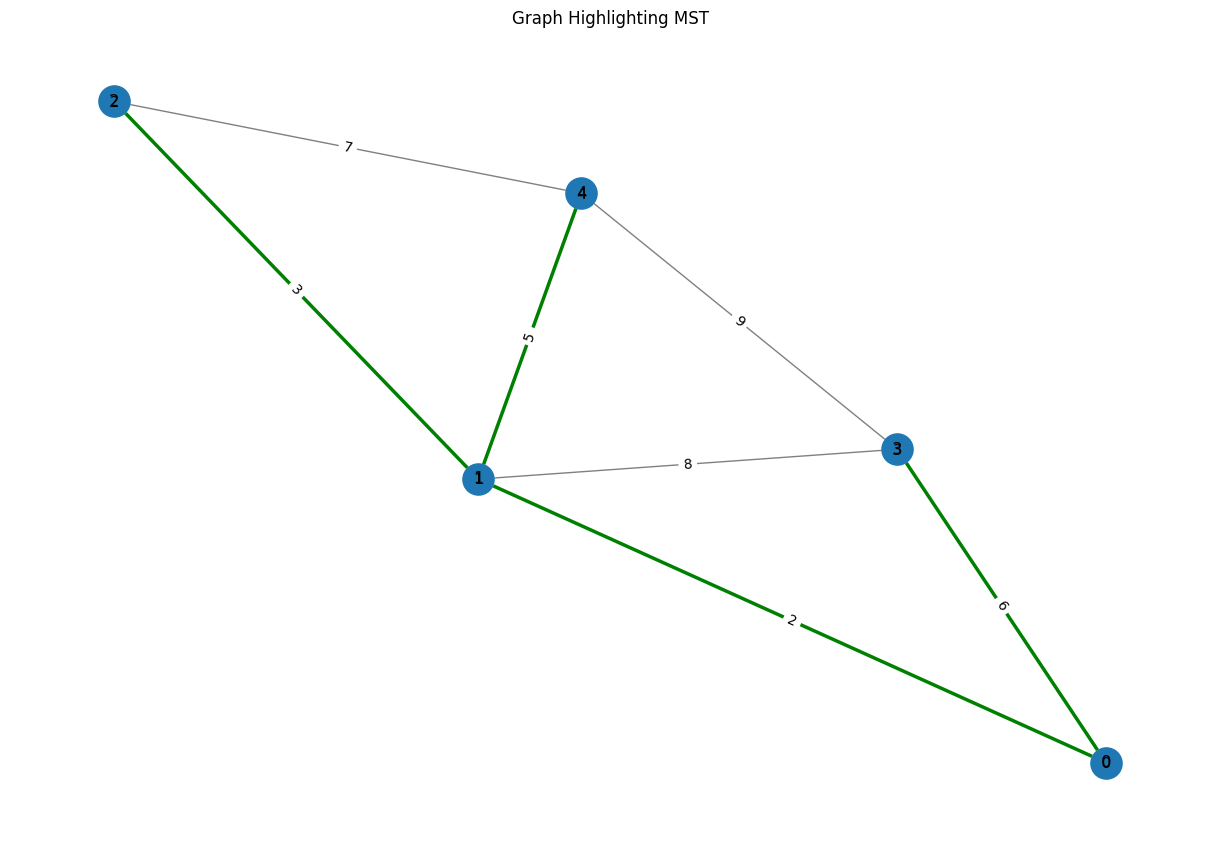

In [18]:
# Create the graph
graph = create_graph()

# Run Prim's algorithm
mst_edges, total_weight = prims_algorithm(graph)

# Output results
print("Edges in the MST and their weights:")
for u, v, weight in mst_edges:
    print(f"Edge ({u} - {v}): Weight = {weight}")

print(f"Total weight of the MST: {total_weight}")

# Visualize the graph and the MST
visualize_graph_and_mst(graph, mst_edges)

***Time Complexity:***

Finding the smallest edge at each step takes O(V).
This is repeated V times, leading to a total time complexity of O(V^2).

***Space Complexity:***

The adjacency matrix requires O(V^2) space.
Other structures (like min_edge, parent, in_mst) require O(V) space.

***Algorithm Design:***

This implementation uses a greedy design technique, as it builds the MST incrementally by always choosing the minimum weight edge.

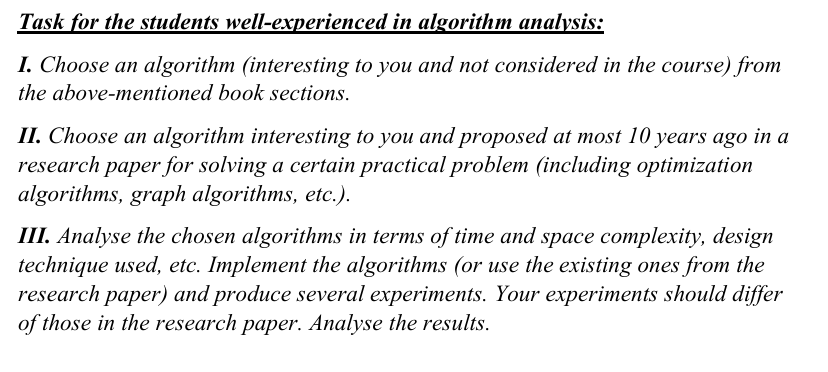

The algorithm that I've chosen for this part of assignment is Floyd-Warshall Algorithm. It has also been discussed in a paper published in 2017, regarding best route selection using Djikstras Algorithm and this algorithm. Link to the paper is attached down below:

"https://ieeexplore.ieee.org/abstract/document/8265662"

To answer the questions of the assignment I'll again be using a problem present in the exercise. The Question is as follows:

Run the Floyd-Warshall algorithm on the weighted, directed graph of Figure 25.2. Show the matrix D^k? that results for each iteration of the outer loop.

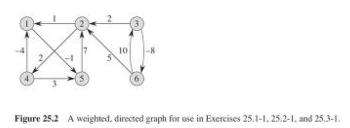

# Initializing the graph and distance matrix

In [19]:
import numpy as np

# Initialize the number of vertices
V = 6  # 6 vertices labeled 1 to 6

# Create the initial distance matrix (D^0)
# Use np.inf to represent infinity (no direct edge between vertices)
graph = np.full((V, V), np.inf)
np.fill_diagonal(graph, 0)

# Add edges to the graph based on the given information
edges = [
    (1, 2, 2),  # Edge (1 -> 2) with weight 2
    (1, 3, -4),  # Edge (1 -> 3) with weight -4
    (2, 3, 7),  # Edge (2 -> 3) with weight 7
    (2, 5, 10),  # Edge (2 -> 5) with weight 10
    (3, 1, 4),  # Edge (3 -> 1) with weight 4
    (3, 2, 2),  # Edge (3 -> 2) with weight 2
    (4, 1, 3),  # Edge (4 -> 1) with weight 3
    (5, 6, 8),  # Edge (5 -> 6) with weight 8
    (6, 4, 5),  # Edge (6 -> 4) with weight 5
]

# Add the edges to the distance matrix
for u, v, weight in edges:
    graph[u-1, v-1] = weight  # Subtract 1 to use zero-based indexing

# Print the initial distance matrix D^0
print("Initial distance matrix (D^0):")
print(graph)

Initial distance matrix (D^0):
[[ 0.  2. -4. inf inf inf]
 [inf  0.  7. inf 10. inf]
 [ 4.  2.  0. inf inf inf]
 [ 3. inf inf  0. inf inf]
 [inf inf inf inf  0.  8.]
 [inf inf inf  5. inf  0.]]


# Implementing the Floyd-Warshall Algorithm

In [32]:
def floyd_warshall(graph):
    V = len(graph)

    # Create a copy of the graph to update during the algorithm
    dist_matrix = graph.copy()

    # Run the Floyd-Warshall algorithm
    for k in range(V):
        # Update the distance matrix for each pair of vertices i, j
        for i in range(V):
            for j in range(V):
                dist_matrix[i][j] = min(dist_matrix[i][j], dist_matrix[i][k] + dist_matrix[k][j])

        # Print the distance matrix D^k after each iteration
        print(f"\nDistance matrix D^{k+1}:")
        print(dist_matrix)

    return

# Running the algorithm

In [33]:
floyd_warshall(graph)


Distance matrix D^1:
[[ 0.  2. -4. inf inf inf]
 [inf  0.  7. inf 10. inf]
 [ 4.  2.  0. inf inf inf]
 [ 3.  5. -1.  0. inf inf]
 [inf inf inf inf  0.  8.]
 [inf inf inf  5. inf  0.]]

Distance matrix D^2:
[[ 0.  2. -4. inf 12. inf]
 [inf  0.  7. inf 10. inf]
 [ 4.  2.  0. inf 12. inf]
 [ 3.  5. -1.  0. 15. inf]
 [inf inf inf inf  0.  8.]
 [inf inf inf  5. inf  0.]]

Distance matrix D^3:
[[ 0. -2. -4. inf  8. inf]
 [11.  0.  7. inf 10. inf]
 [ 4.  2.  0. inf 12. inf]
 [ 3.  1. -1.  0. 11. inf]
 [inf inf inf inf  0.  8.]
 [inf inf inf  5. inf  0.]]

Distance matrix D^4:
[[ 0. -2. -4. inf  8. inf]
 [11.  0.  7. inf 10. inf]
 [ 4.  2.  0. inf 12. inf]
 [ 3.  1. -1.  0. 11. inf]
 [inf inf inf inf  0.  8.]
 [ 8.  6.  4.  5. 16.  0.]]

Distance matrix D^5:
[[ 0. -2. -4. inf  8. 16.]
 [11.  0.  7. inf 10. 18.]
 [ 4.  2.  0. inf 12. 20.]
 [ 3.  1. -1.  0. 11. 19.]
 [inf inf inf inf  0.  8.]
 [ 8.  6.  4.  5. 16.  0.]]

Distance matrix D^6:
[[ 0. -2. -4. 21.  8. 16.]
 [11.  0.  7. 23. 10. 18.]

# Time Complexity:

The Floyd-Warshall algorithm has three nested loops, each running over all vertices:

Outer loop: Iterates over all intermediate vertices (k).

Inner loops: For each pair of vertices (i,j), we check if an intermediate vertex k provides a shorter path.

The time complexity is therefore: O(V^3)

where V is the number of vertices in the graph. This is because for each of the V iterations of the outer loop, we perform O(V^2) work (checking each pair of vertices).

# Space Complexity:
Space complexity is dominated by the distance matrix D^0  , which requires storing the shortest path distances between all pairs of vertices. The space complexity is:O(V^2) because the distance matrix is of size V×V, where V is the number of vertices.

Additionally, if the graph is represented as an adjacency matrix, this also contributes O(V^2) space.

# Design Technique Used:
The Floyd-Warshall algorithm is a dynamic programming algorithm. It is based on the bottom-up approach, where we iteratively improve the solution by considering each vertex as an intermediate point. The key idea is to update the distance matrix iteratively to find the shortest paths between all pairs of vertices.